In [1]:
import numpy as np
import pandas as pd
import utilities as utl


In [2]:
reactants = np.array([["C2H5OH(l, ethanol)", -1], ["O2(g)", -3]])
products = np.array([["H2O(l)", 3], ["CO2(g)", 2]])

In [3]:
dG_f0, dH_f0, dS0, vi, r_298K, p_298K = utl.standard_properties(reactants, products)


Reactant Properties:
                 Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
58   C2H5OH(l, ethanol)       -277.69      160.700       -174.78          1.0   
142               O2(g)          0.00      205.138          0.00          3.0   

     Weighted_DHf  Weighted_DGf  Weighted_S  
58        -277.69       -174.78     160.700  
142          0.00          0.00     615.414   

Product Properties:
    Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
63  CO2(g)      -393.509       213.74      -394.359          2.0   
89  H2O(l)      -285.830        69.91      -237.129          3.0   

    Weighted_DHf  Weighted_DGf  Weighted_S  
63      -787.018      -788.718      427.48  
89      -857.490      -711.387      209.73   

ΔG°: -1325.325 kJ/mol, spontaneous.
ΔH°: -1366.818 kJ/mol, exothermic.
ΔS°: -0.13916820392419904 kJ/(K·mol), decreased disorder.
ln(K_a): 534.6598305620608
K_a: 1.5842149539588793e+232
Net Stoichiometric Coefficient (v_i): 1.0


In [4]:
temperatures = np.array([350, 500, 600, 800, 1000, 1200, 1500])
results = utl.properties_temperature(temperatures, dG_f0, dS0)

   Temperature (K)  ΔG° (kJ/mol)     ln(K_a)            K_a
0              350  -1276.616129  438.714777  3.399434e+190
1              500  -1255.740898  302.078638  1.552693e+131
2              600  -1241.824078  248.942362  1.301050e+108
3              800  -1213.990437  182.522017   1.854832e+79
4             1000  -1186.156796  142.669809   9.135051e+61
5             1200  -1158.323155  116.101671   2.644327e+50
6             1500  -1116.572694   89.533533   7.654547e+38


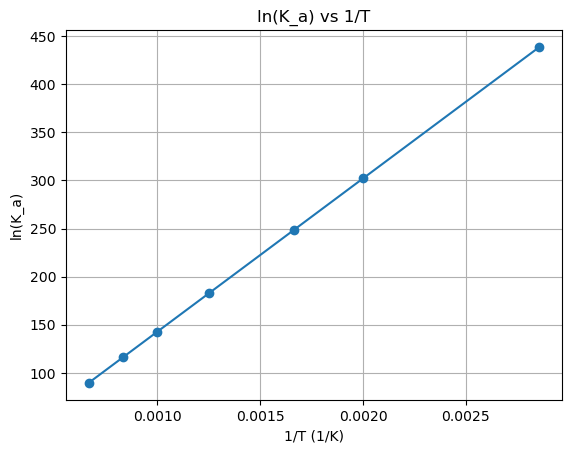

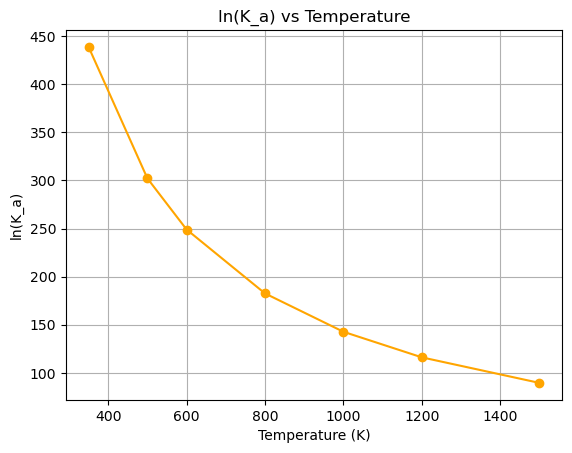

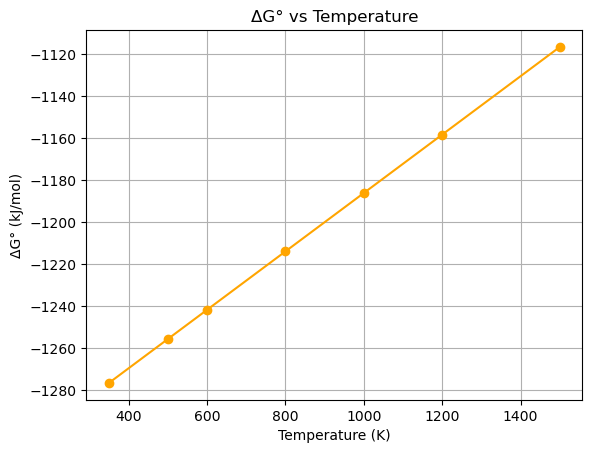

In [5]:
utl.graphs(results)